In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("F:\PYTHAN\PYTHAN\iNeuron\EDA\Practice\Student_performance\student.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
for i in df.columns:
    print(df[i].unique())
    

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

gender : sex of students -> (Male/female)
    
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
    
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)
    
test preparation course : complete or not complete before test
    
math score

reading score

writing score

In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

There are no duplicate and missing value

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [18]:
# Adding columns for "Total Score" and "Average"

In [31]:
df['total_score']  = df['math score']  + df['reading score']+ df['writing score']

In [33]:
df['average_score'] = df['total_score']/3

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
# define numerical & categorical columns

In [37]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average_score'],
      dtype='object')

In [38]:
df_num = []
df_cat = []
for i in df.columns:
    if df[i].dtypes == 'O':
        df_cat.append(i)
    else:
        df_num.append(i)

In [39]:
df_num

['math score',
 'reading score',
 'writing score',
 'total_score',
 'average_score']

In [40]:
df[df_num].head()

,math score,reading score,writing score,total_score,average_score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


In [41]:
df_cat

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [42]:
df[df_cat].head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed


In [20]:
#Number of students with full marks, more then 80 and less than 20 in Maths

#Number of students with full marks more then 80 and less than 20  in Writing

#Number of students with full marks more then 80 and less than 20 in Reading

In [43]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [46]:
df[df['math score'] ==100]['math score'].count()

7

In [47]:
df[df['math score'] >=80]['math score'].count()

193

In [48]:
df[df['math score'] <=20]['math score'].count()

4

In [49]:
df[df['reading score'] ==100]['reading score'].count()

17

In [50]:
df[df['reading score'] >=80]['reading score'].count()

249

In [51]:
df[df['reading score'] <=20]['reading score'].count()

1

In [52]:
df[df['writing score'] ==100]['writing score'].count()

14

In [53]:
df[df['writing score'] >=80]['writing score'].count()

235

In [54]:
df[df['writing score'] <=20]['writing score'].count()

3

In [56]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


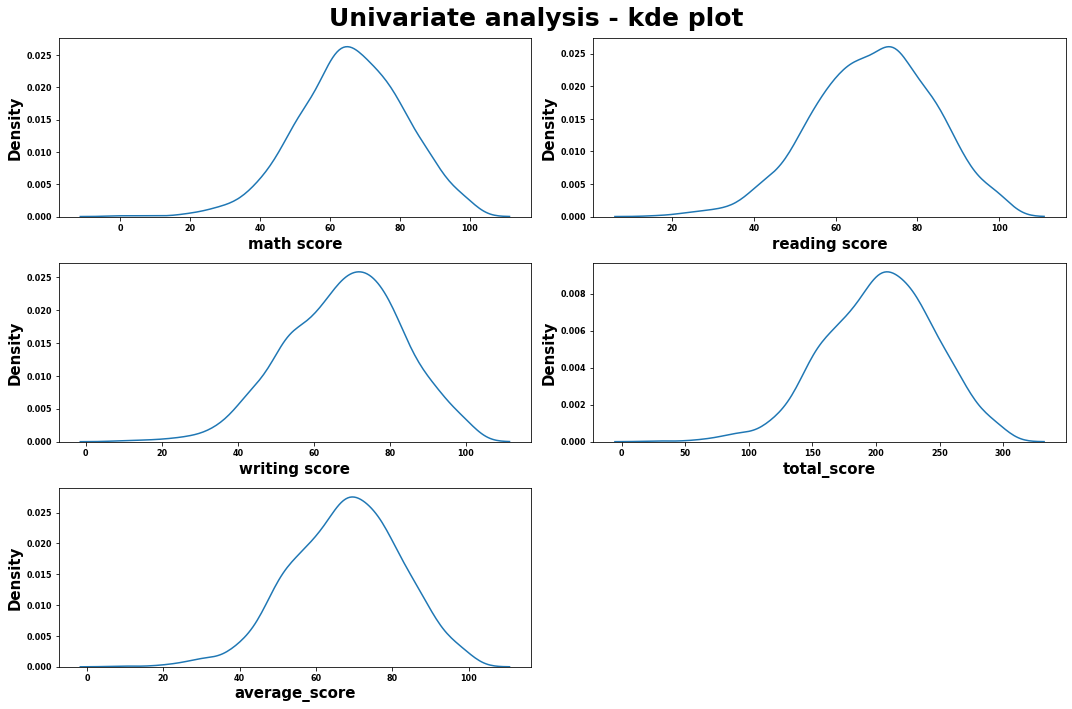

In [64]:
plt.figure(figsize = (15,10))
plt.suptitle('Univariate analysis - kde plot', fontsize = 25, weight = 'bold')
for i in range(0,len(df_num)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x = df[df_num[i]])
    plt.xlabel(df_num[i],fontsize = 15, weight = 'bold')
    plt.ylabel('Density',fontsize = 15, weight = 'bold')
    plt.xticks(fontsize = 8, weight = 'bold')
    plt.yticks(fontsize = 8, weight = 'bold')
    plt.tight_layout()
    
    

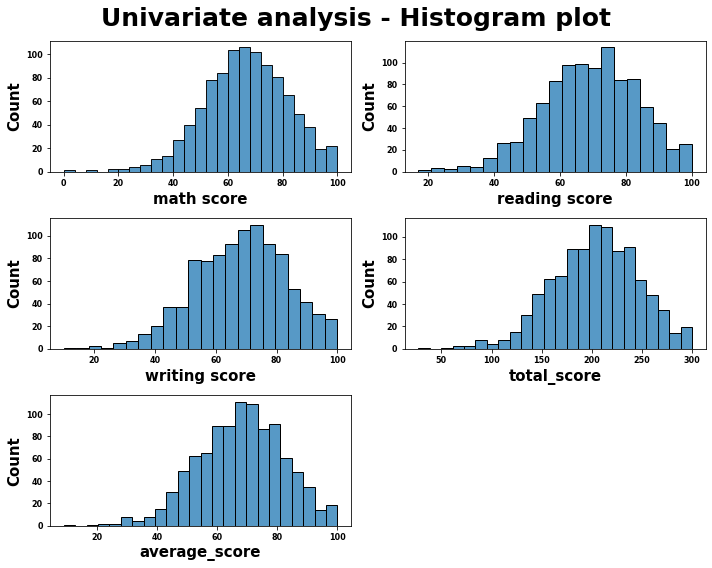

In [73]:
plt.figure(figsize = (10,8))
plt.suptitle('Univariate analysis - Histogram plot', fontsize = 25, weight = 'bold')
for i in range(0,len(df_num)):
    plt.subplot(3,2,i+1)
    sns.histplot(x = df[df_num[i]])
    plt.xlabel(df_num[i],fontsize = 15, weight = 'bold')
    plt.ylabel('Count',fontsize = 15, weight = 'bold')
    plt.xticks(fontsize = 8, weight = 'bold')
    plt.yticks(fontsize = 8, weight = 'bold')
    plt.tight_layout()


In [74]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


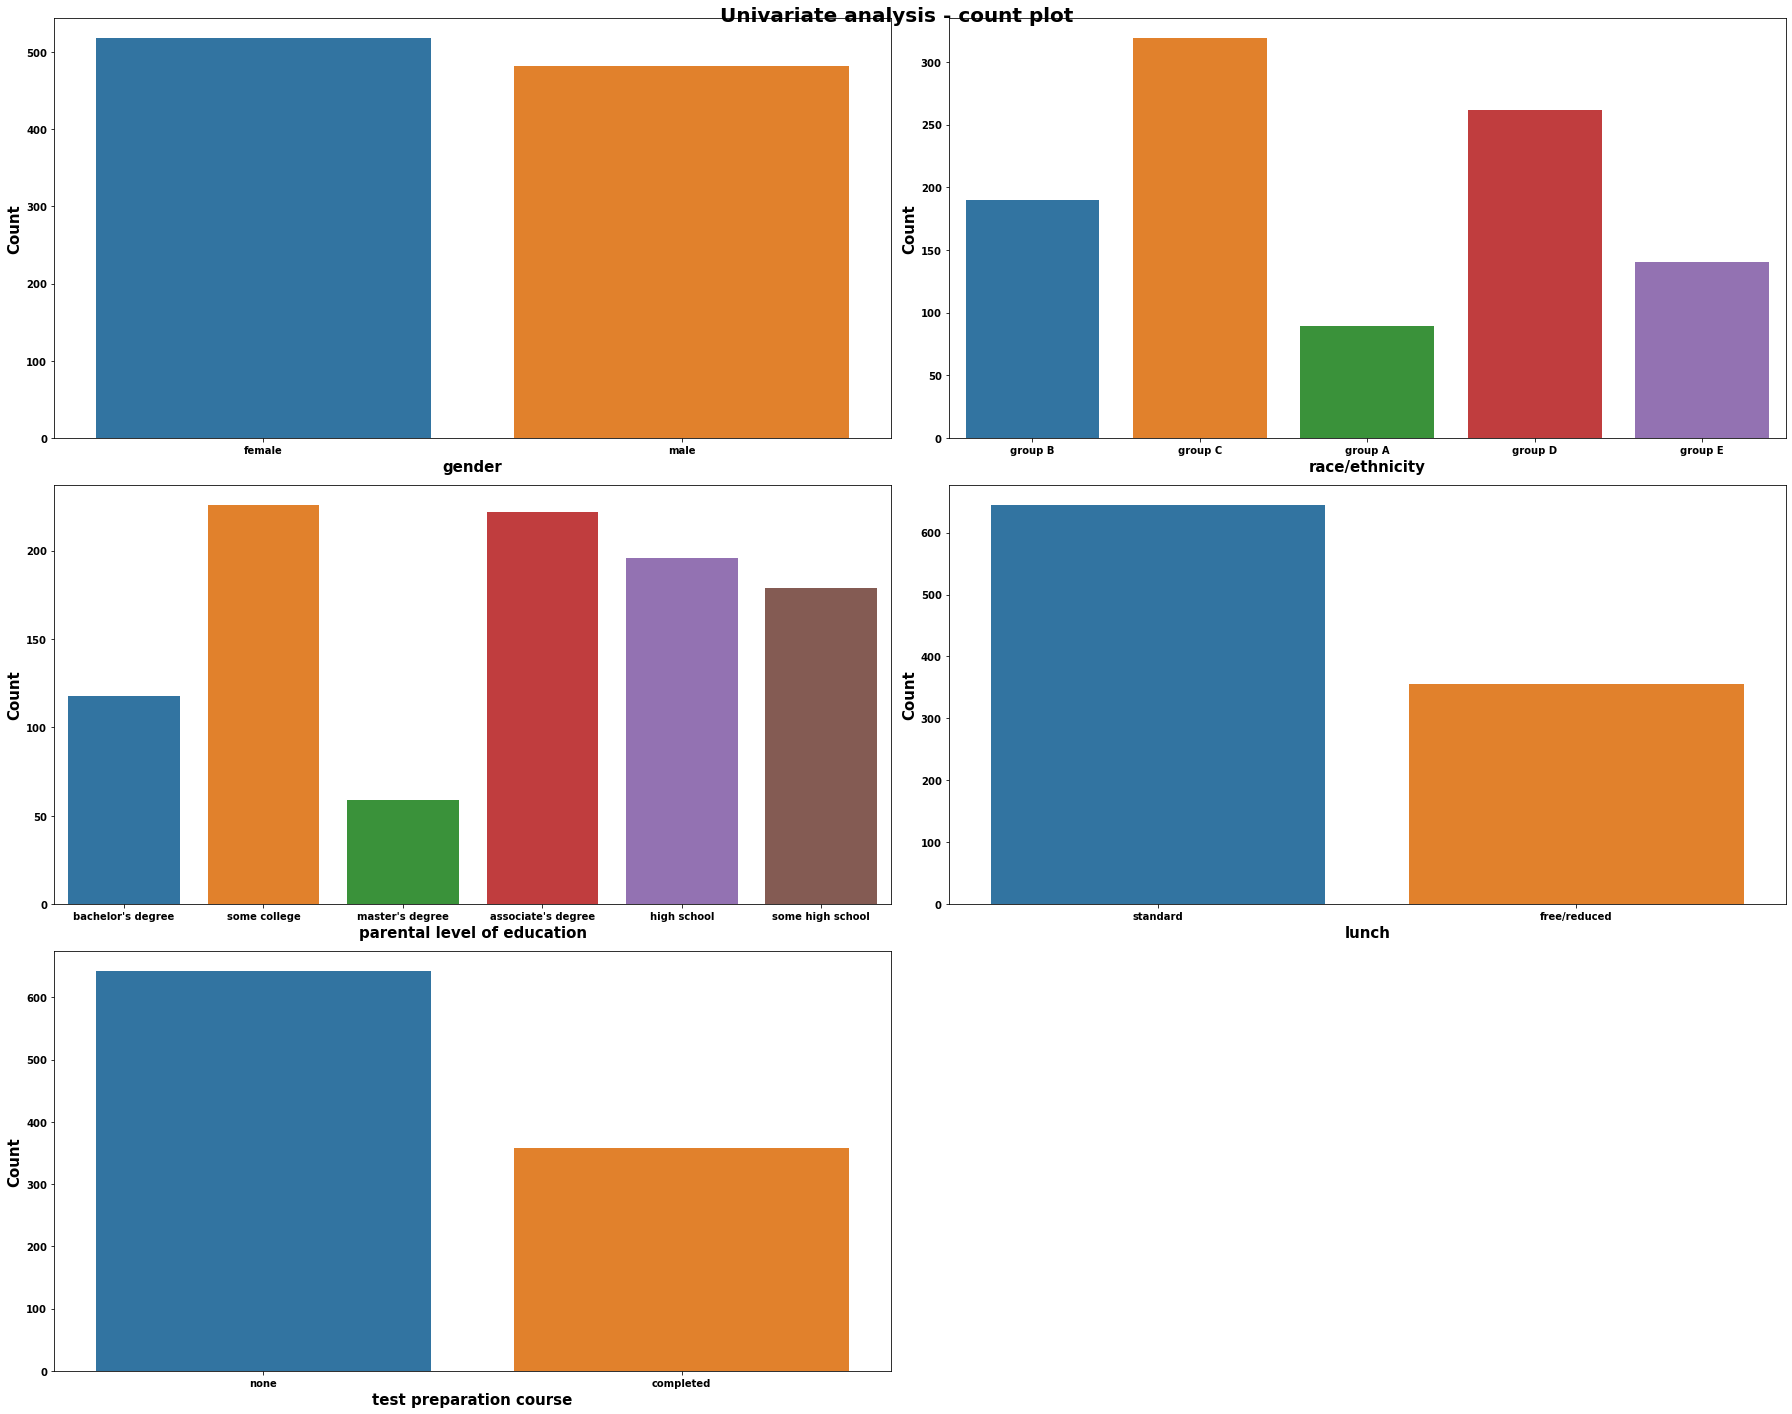

In [104]:
plt.figure(figsize = (25,20))
plt.suptitle('Univariate analysis - count plot', fontsize = 20, weight = 'bold')
for i in range(0,len(df_cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(x = df[df_cat[i]],)
    plt.xlabel(df_cat[i],fontsize = 15, weight = 'bold')
    plt.ylabel('Count',fontsize = 15, weight = 'bold')
    plt.xticks(fontsize = 10, weight = 'bold')
    plt.yticks(fontsize = 10, weight = 'bold')
    plt.tight_layout()
   
   

In [23]:
#BIVARIATE ANALYSIS ( Is gender has any impact on student's performance average and math score ? )

In [105]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [109]:
df[df_num].corr()

,math score,reading score,writing score,total_score,average_score
math score,1.000000,0.817580,0.802642,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
average_score,0.918746,0.970331,0.965667,1.000000,1.000000


Text(0.5, 0.98, 'Multvarate analysis - corrilation')

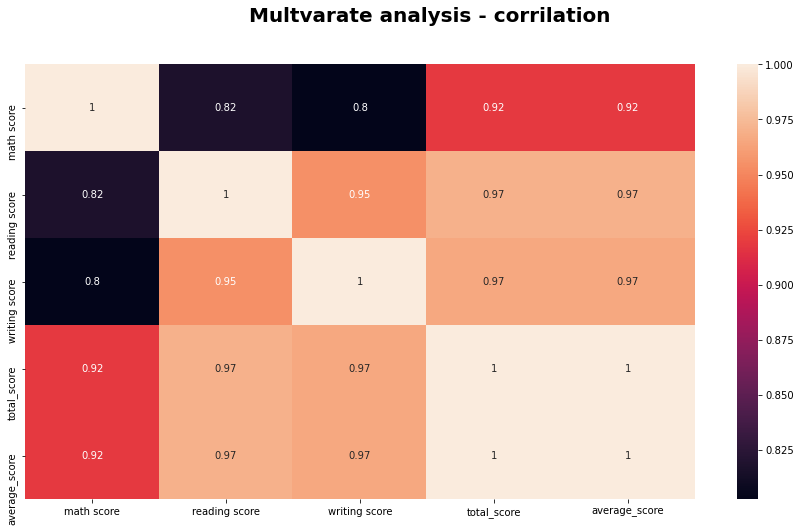

In [117]:
plt.figure(figsize = (15,8))
sns.heatmap(df[df_num].corr(), annot=True)
plt.suptitle('Multvarate analysis - corrilation', fontsize = 20, weight = 'bold')

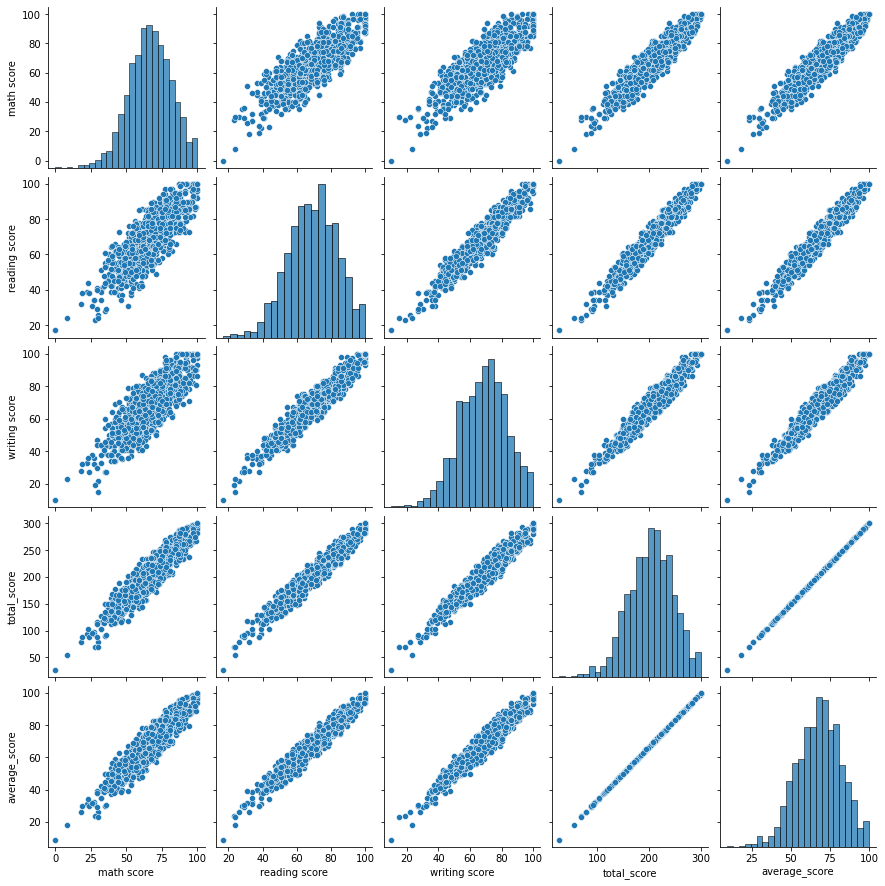

In [130]:
sns.pairplot(df[df_num])

In [120]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


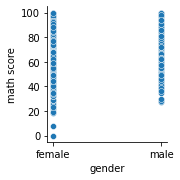

In [142]:
sns.pairplot(data = df ,x_vars= 'gender',y_vars='math score')

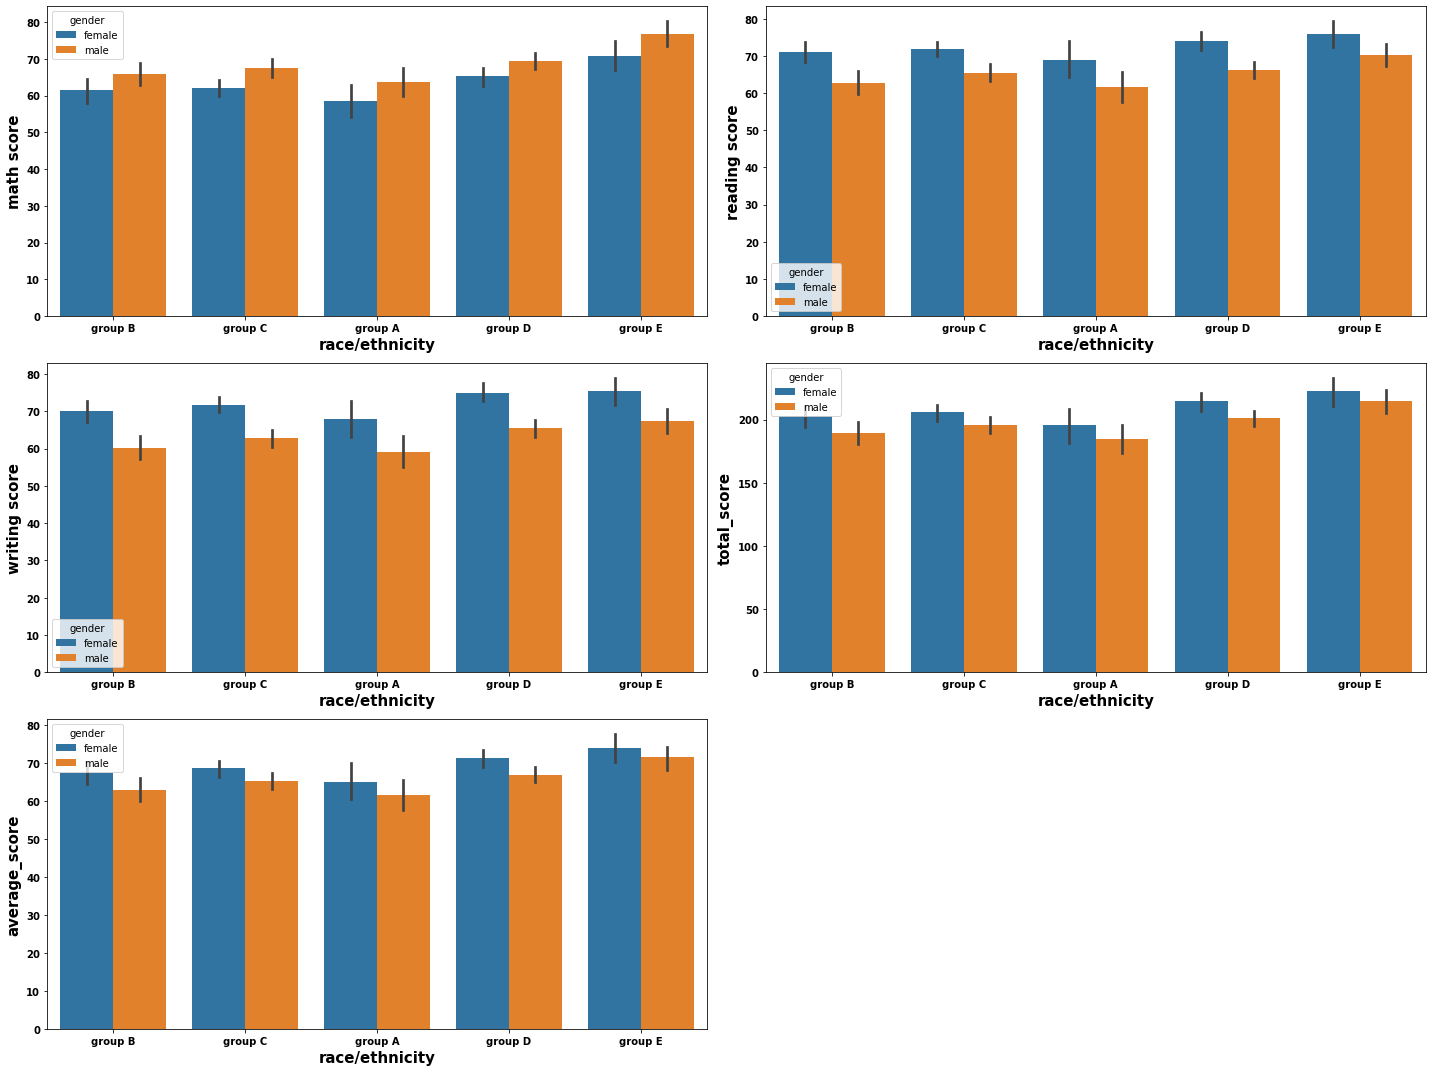

In [149]:
plt.figure(figsize=(20, 15))
for i in range(len(df_num)):
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df, x='race/ethnicity', y=df[df_num[i]], hue = 'gender')
    plt.xlabel('race/ethnicity', fontsize=15, weight='bold')
    plt.ylabel(df_num[i], fontsize=15, weight='bold')
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.tight_layout()

Average score, Total score, writing score, reading score  is more in female catogary 


Only male category have more in math score

Group A has least score in all category and group E has most score in all category



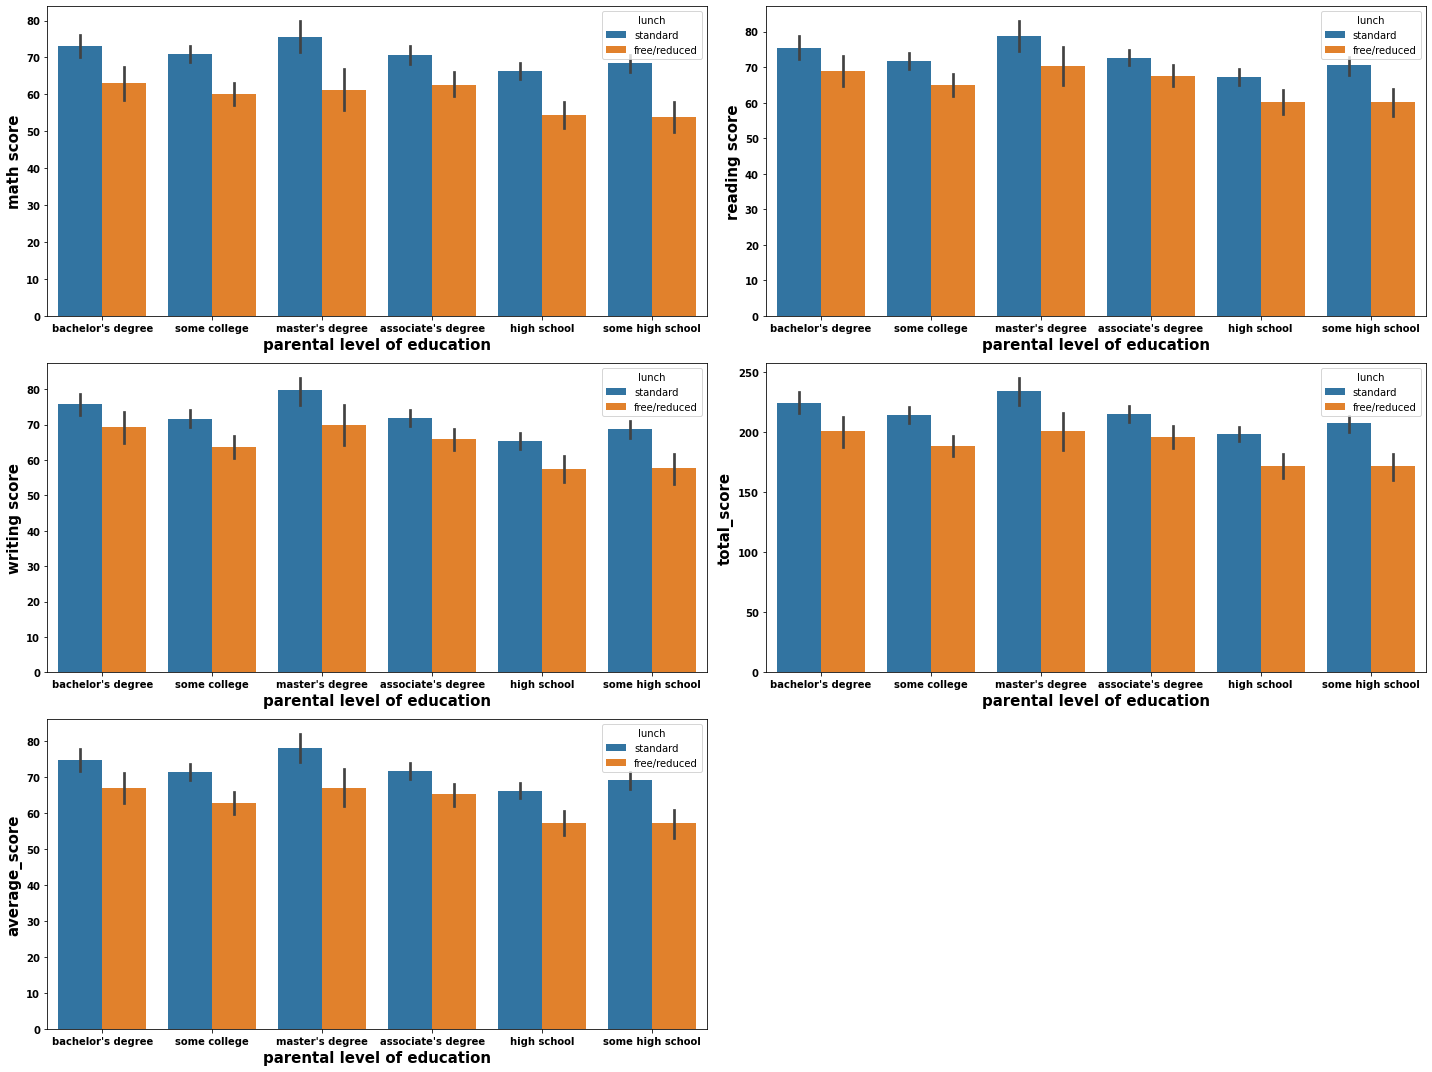

In [150]:
plt.figure(figsize=(20, 15))
for i in range(len(df_num)):
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df, x='parental level of education', y=df[df_num[i]], hue = 'lunch')
    plt.xlabel('parental level of education', fontsize=15, weight='bold')
    plt.ylabel(df_num[i], fontsize=15, weight='bold')
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.tight_layout()

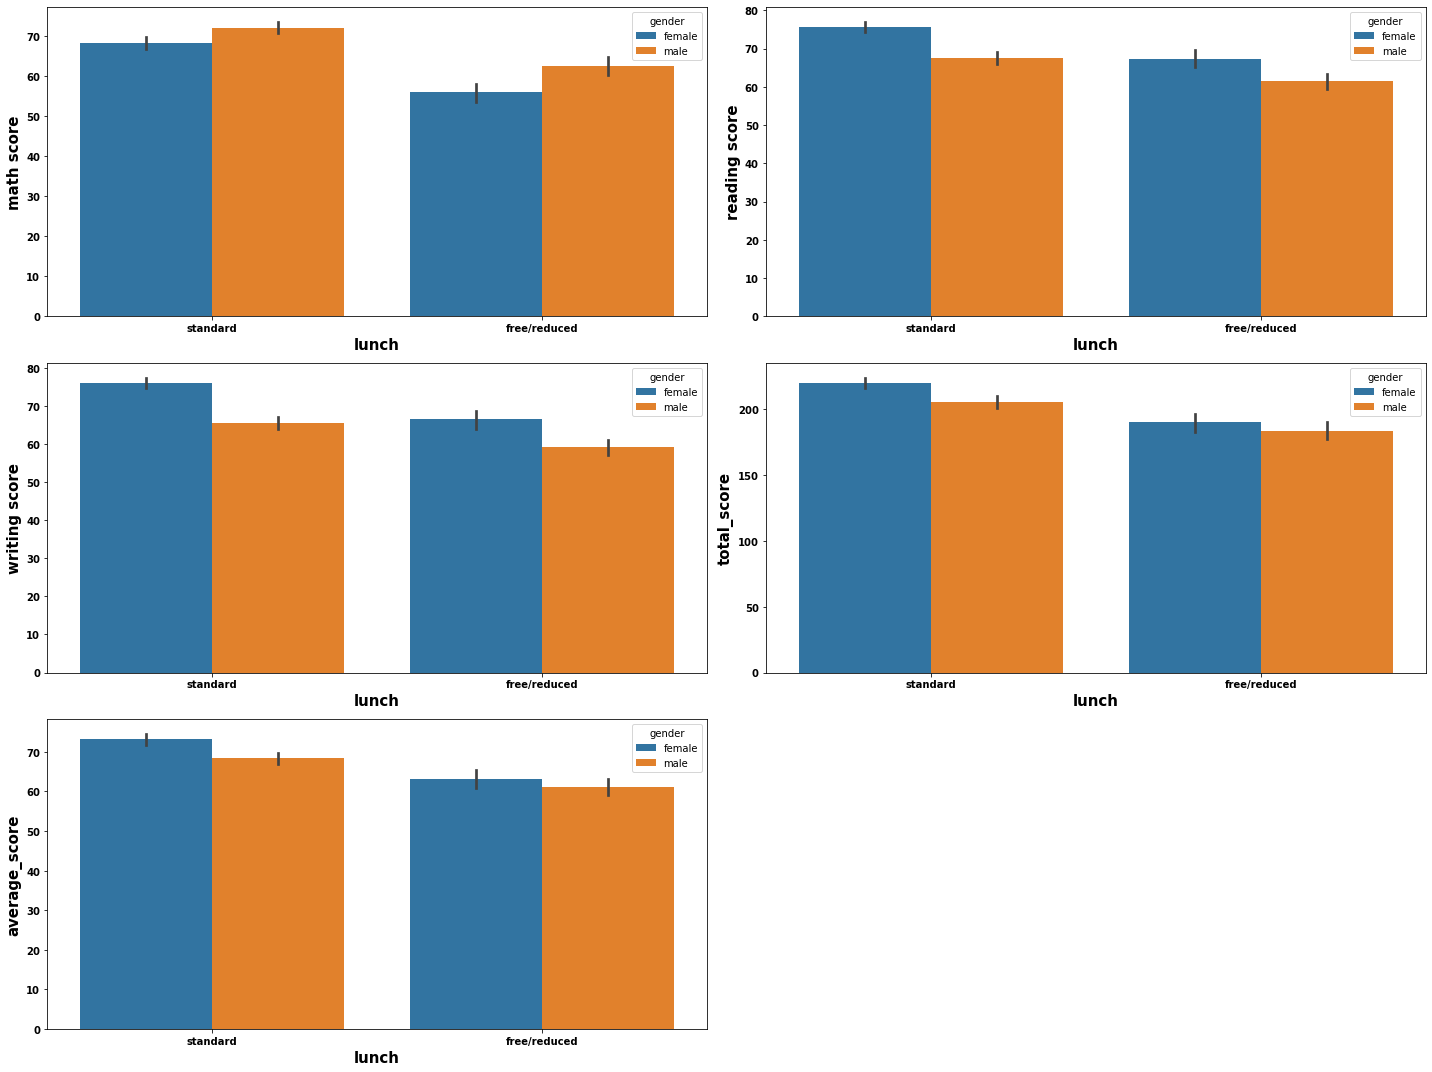

In [152]:
plt.figure(figsize=(20, 15))
for i in range(len(df_num)):
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df, x='lunch', y=df[df_num[i]], hue = 'gender')
    plt.xlabel('lunch', fontsize=15, weight='bold')
    plt.ylabel(df_num[i], fontsize=15, weight='bold')
    plt.xticks(fontsize=10, weight='bold')
    plt.yticks(fontsize=10, weight='bold')
    plt.tight_layout()

students (male or female) got more score in all category who has taken standard lunch 

students got more score in all category who's parent educaton is master degree and students got less score in all category who's parent educaton is high school




In [22]:
# Maximumum score of students in all three subjects

In [154]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


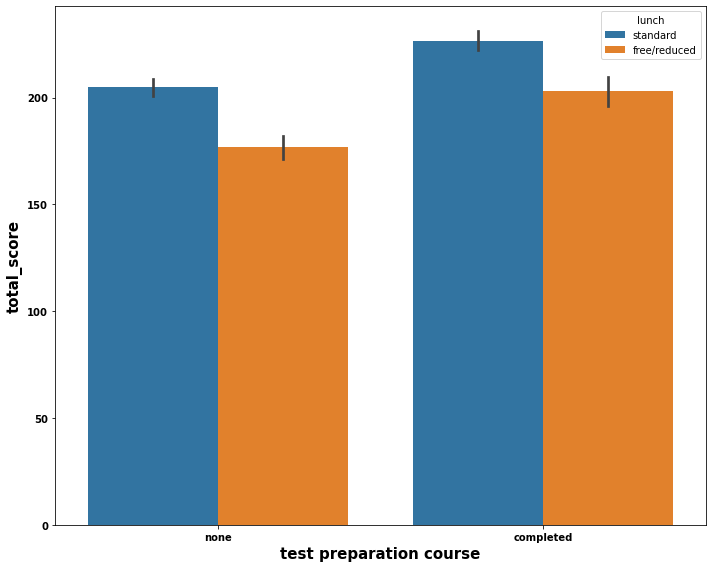

In [186]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'test preparation course',y = 'total_score', data = df,hue= 'lunch')
plt.xlabel('test preparation course', fontsize=15, weight='bold')
plt.ylabel('total_score', fontsize=15, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.tight_layout()

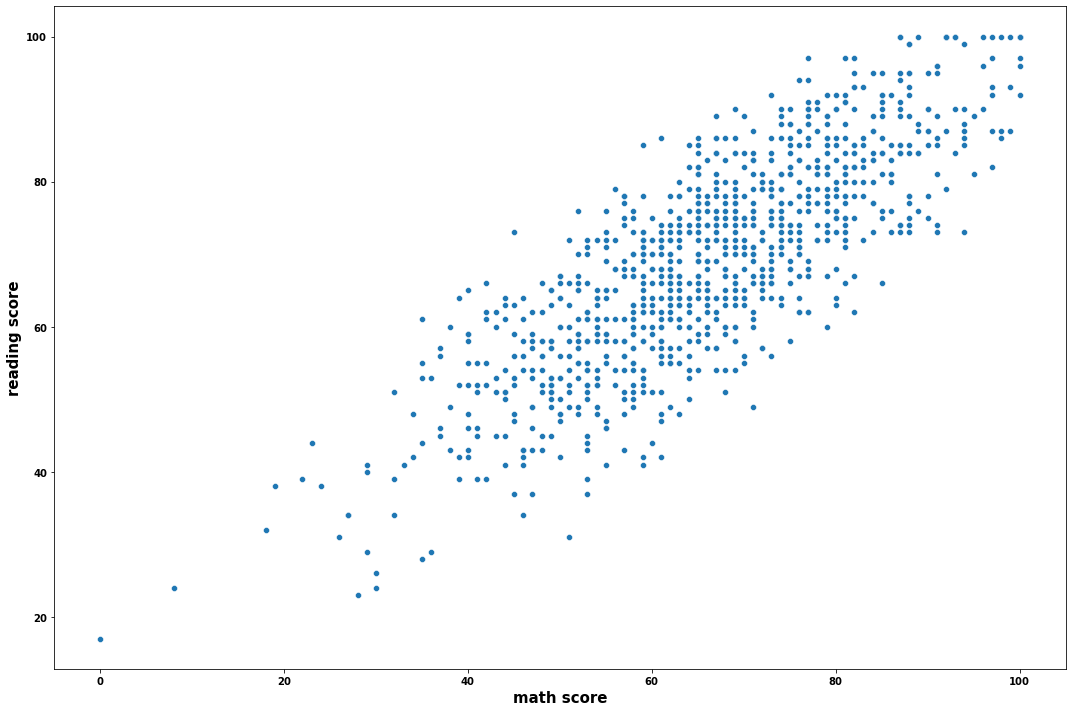

In [172]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df[df_num], x='math score', y='reading score')
plt.xlabel('math score', fontsize=15, weight='bold')
plt.ylabel('reading score', fontsize=15, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.tight_layout()

In [166]:
df_num


['math score',
 'reading score',
 'writing score',
 'total_score',
 'average_score']

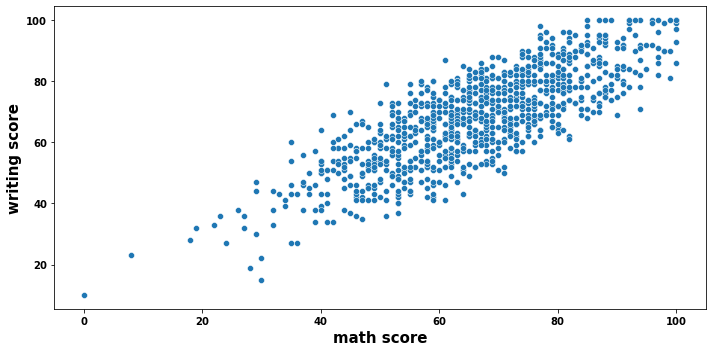

In [176]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df_num], x='math score', y='writing score')
plt.xlabel('math score', fontsize=15, weight='bold')
plt.ylabel('writing score', fontsize=15, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.tight_layout()

# Detect outlier in deta set

<AxesSubplot:>

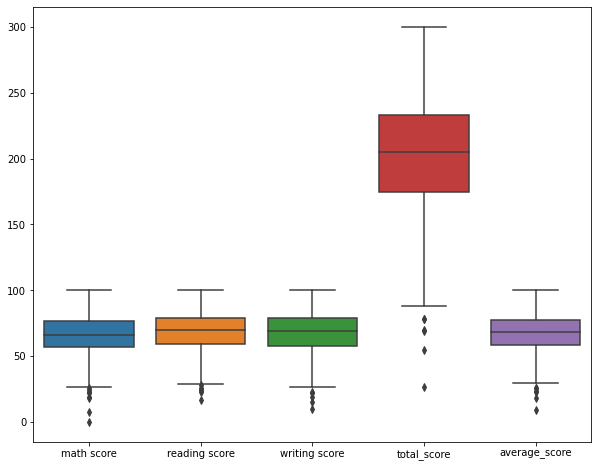

In [185]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df)

# Interquartile Range Method( IQR ) method

In [221]:
df1 = df.copy()



In [241]:


def remove_outliers_IQR(data,column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    data[column_name] = np.where(data[column_name]>upper_limit , upper_limit ,np.where(data[column_name]<lower_limit,lower_limit,data[column_name]) )
    return data[column_name]
    


In [245]:
remove_outliers_IQR(df,'math score')


0      72.0
1      90.0
2      95.0
3      57.0
4      78.0
       ... 
995    99.0
996    55.0
997    71.0
998    78.0
999    86.0
Name: reading score, Length: 1000, dtype: float64

In [253]:
remove_outliers_IQR(df,'writing score')


0      74.0
1      88.0
2      93.0
3      44.0
4      75.0
       ... 
995    95.0
996    55.0
997    65.0
998    77.0
999    86.0
Name: writing score, Length: 1000, dtype: float64

In [254]:
remove_outliers_IQR(df,'reading score')

0      72.0
1      90.0
2      95.0
3      57.0
4      78.0
       ... 
995    99.0
996    55.0
997    71.0
998    78.0
999    86.0
Name: reading score, Length: 1000, dtype: float64

<AxesSubplot:>

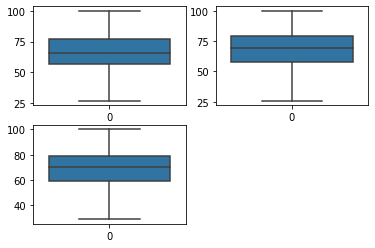

In [262]:
plt.subplot(2,2,1)
sns.boxplot(data = df['math score'])

plt.subplot(2,2,2)
sns.boxplot(data = df['writing score'])

plt.subplot(2,2,3)
sns.boxplot(data = df['reading score'])


In [7]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()

In [10]:
from scipy import stats

C:\Users\vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


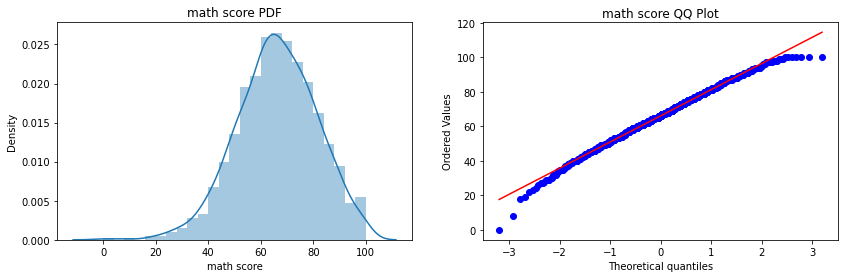

In [11]:
plot_qq_plot('math score')

In [269]:
pip install scipy

C:\Users\vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


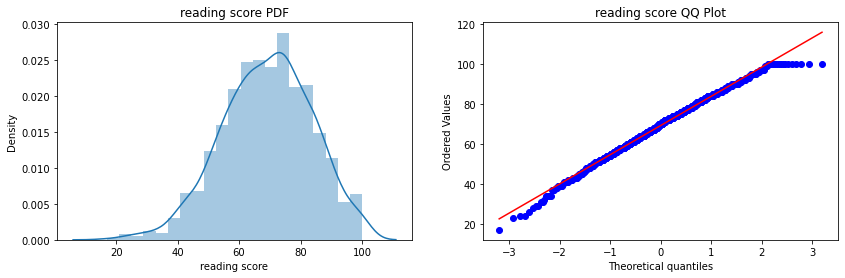

In [12]:
plot_qq_plot('reading score')